<a href="https://colab.research.google.com/github/SHREY29K/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the Dataset

In [2]:
dataset = pd.read_csv('train.csv')

Processing the dataset

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.info() #from here we would know the null values, and further we would handle them
#as we see in for example in cabin only 204 are not null the rest of it's is null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#will drop cabins, i think not a necessary column for processing
dataset = dataset.drop(columns='Cabin', axis=1)

In [8]:
#Now the 'age' column cannot be dropped as it's an important column
#Hence, we will replace it wid the mean
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

In [9]:
#We still hace embarked left, it has categorical data
#hence mode is to be used
print(dataset['Embarked'].mode()[0])

S


In [10]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [11]:
dataset.isnull().sum()
#all null values have been handles now

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Analyze the data now

In [12]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

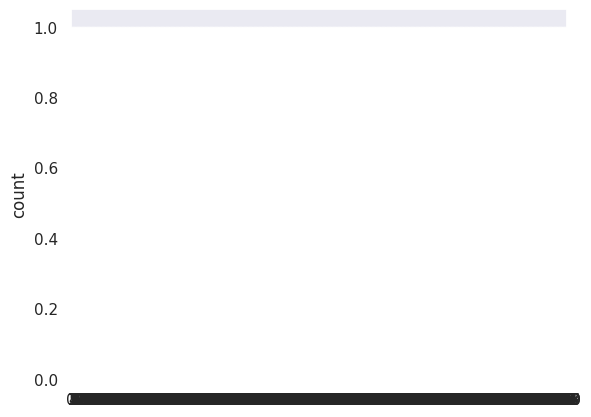

In [14]:
sns.set()
sns.countplot(dataset['Survived'])

<Axes: xlabel='count', ylabel='Sex'>

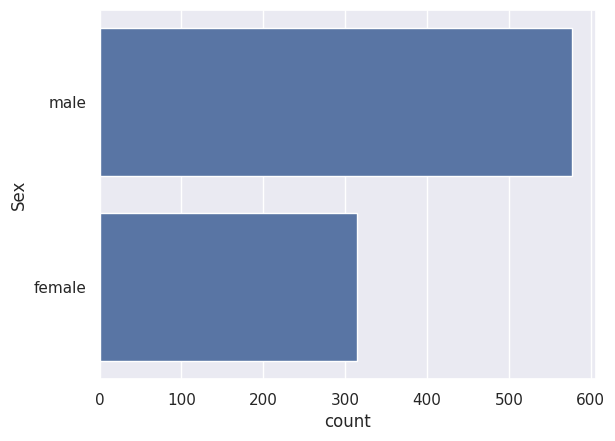

In [15]:
sns.countplot(dataset['Sex'])
#the total number of males and females on the titanic

Sex
male      577
female    314
Name: count, dtype: int64
Total number of survived according to their gender
Sex
female    233
male      109
Name: count, dtype: int64


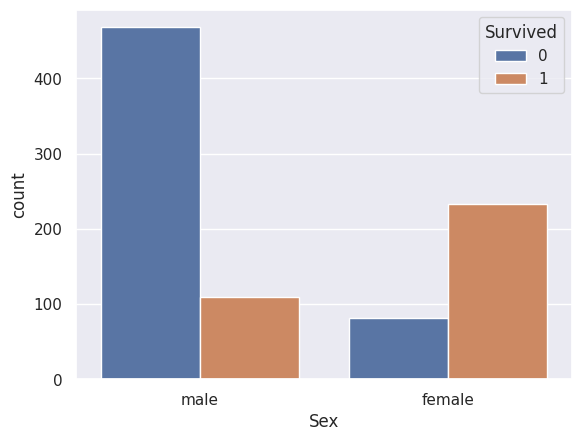

In [16]:
#now we need to know how many of them survived
sns.countplot(x='Sex', hue='Survived', data=dataset)
gender_count = dataset['Sex'].value_counts()
print(gender_count)
survivor_counts = dataset[dataset['Survived'] == 1]['Sex'].value_counts()
print("Total number of survived according to their gender")
print(survivor_counts)


Sex
male      58
female    55
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of children survived by their gender')

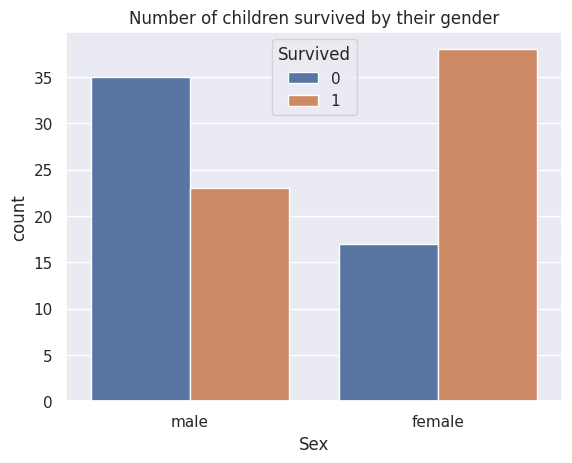

In [17]:
#How many were children
age_decide = 18
children = dataset[dataset['Age'] < age_decide]
children_count = children['Sex'].value_counts()
print(children_count)
sns.countplot(x='Sex', hue='Survived', data=children)
plt.title("Number of children survived by their gender")

<Axes: xlabel='Pclass', ylabel='count'>

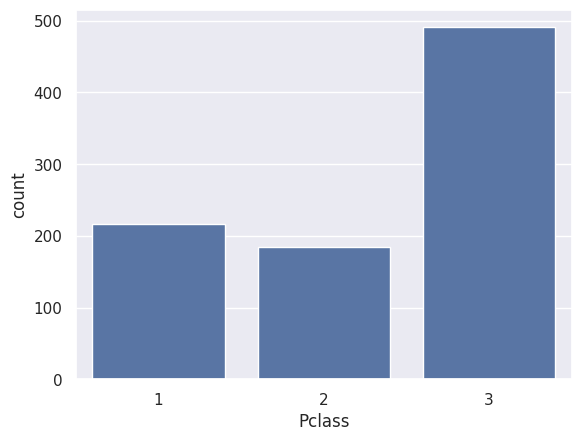

In [18]:
#For the class of each person, visualization is needed (These are the total number of people, not the survived one)
sns.countplot(x='Pclass', data=dataset)

<Axes: xlabel='Pclass', ylabel='count'>

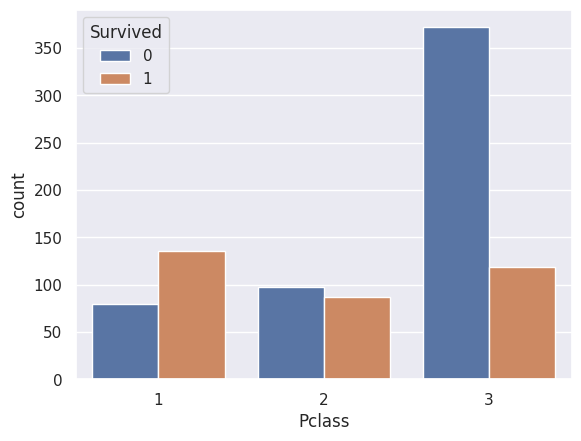

In [19]:
#Now how many of the each ppl survived
sns.countplot(x='Pclass', hue='Survived', data=dataset)

Encoding (Categorical Data)

In [20]:
#added print statement in the first statement because code block executes the last line of the code only.
print(dataset['Sex'].value_counts())
dataset['Embarked'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [21]:
dataset.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [22]:
#Now moving out to the target which is survived column
#for any input we should be able to tell wehether the person survive or not
#and alongside survive or not, we can give the id, name and the ticketID
X = dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = dataset['Survived']

In [23]:
print("This info is about details of the passenger")
print(X)
print("----------------------------------------------------")
print("This info is about the survival of the passenger")
print(Y)

This info is about details of the passenger
     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
----------------------------------------------------
This info is about the survival of the passenger
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0

Splitting the data into Training-Testing Data

In [24]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


Application of Logistic Regression and Model Training

In [25]:
data_model = LogisticRegression()
data_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Prediction and Evaluation

In [26]:
#Training data prediction
X_train_predict = data_model.predict(X_train)
#Adding \n for a line gap
print("The predicted values are as follows", '\n' ,X_train_predict)

The predicted values are as follows 
 [0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0

In [27]:
#Test data prediction
X_test_predict = data_model.predict(X_test)
print("The predicted values are as follows", '\n' ,X_test_predict)

The predicted values are as follows 
 [0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


Accuracy of the Data Evaluation

In [28]:
training_data_accuracy = accuracy_score(Y_train, X_train_predict)
print("The accuracy of the training data is", training_data_accuracy)
print("\n")
testing_data_accuracy = accuracy_score(Y_test, X_test_predict)
print("The accuracy of the testing data is", testing_data_accuracy)

The accuracy of the training data is 0.8075842696629213


The accuracy of the testing data is 0.7821229050279329


Plotting the Accuracy results


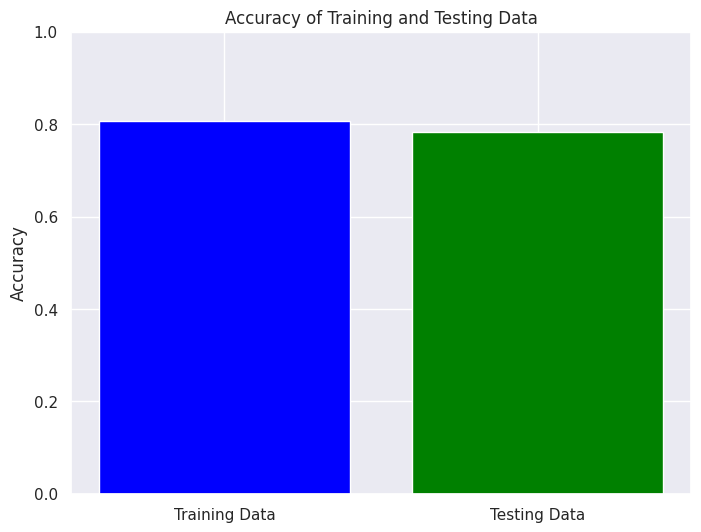

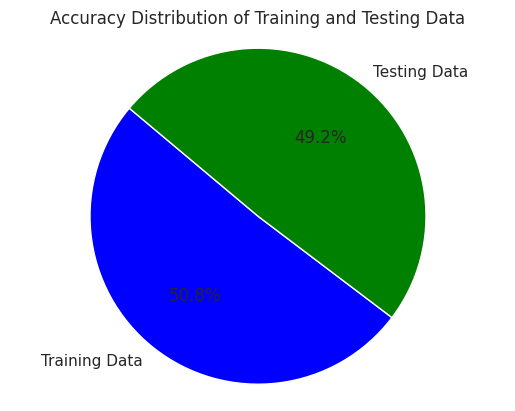

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

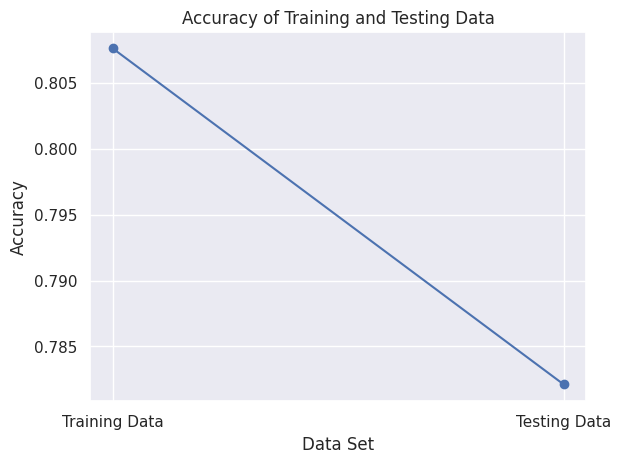

In [29]:
#Plotting the Accuracy
accuracies = [training_data_accuracy, testing_data_accuracy]
labels = ['Training Data', 'Testing Data']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel('Accuracy')
plt.title('Accuracy of Training and Testing Data')
plt.show()

print("\n")

#Using pie-chart now
plt.pie(accuracies, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'green'])
plt.title('Accuracy Distribution of Training and Testing Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#using line-graph now
plt.plot(labels, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Data Set')
plt.ylabel('Accuracy')
plt.title('Accuracy of Training and Testing Data')
plt.grid(True)
plt